In [33]:
import sys
import os
root_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(root_path)

import pandas as pd
import re

ROOT_DIR = r"C:\Projects\Research\SWEEP\SWEEP"

# Load the CSV file
df = pd.read_csv(os.path.join(ROOT_DIR, "test/results/value_adding_analysis/overall/model_comparison.csv"))

# Function to extract Model Version and Model Name
def extract_model_info(model_string):
    match = re.match(r"(.*?)-Value-Classification-(.*)", model_string)
    if match:
        model_version = match.group(1)
        model_name = match.group(2).replace('_', ' ')
        return model_version, model_name
    return None, None

# Apply the function to each row and create new columns
df['Model Version'], df['Model Name'] = zip(*df['Model Name'].apply(extract_model_info))

# Display the results
print(df[['Model Version', 'Model Name']])

   Model Version                              Model Name
0        GPT-3.5                   Neutral Analyst Basic
1        GPT-3.5         Customer Advocate Value Focused
2        GPT-3.5                    Lean Expert Detailed
3        GPT-3.5                     Lean Expert Minimal
4        GPT-3.5           Business Consultant Strategic
5        GPT-3.5           Neutral Analyst Comprehensive
6        GPT-3.5               Process Engineer Detailed
7        GPT-3.5              Process Engineer Technical
8        GPT-3.5  Business Consultant Strategic Detailed
9        GPT-3.5          Subject Matter Expert Detailed
10       GPT-3.5                   LEAN Analyst Detailed
11       GPT-3.5                 Customer Advocate Basic


C:\Users\wmichele\AppData\Local\Temp\ipykernel_35344\385514933.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


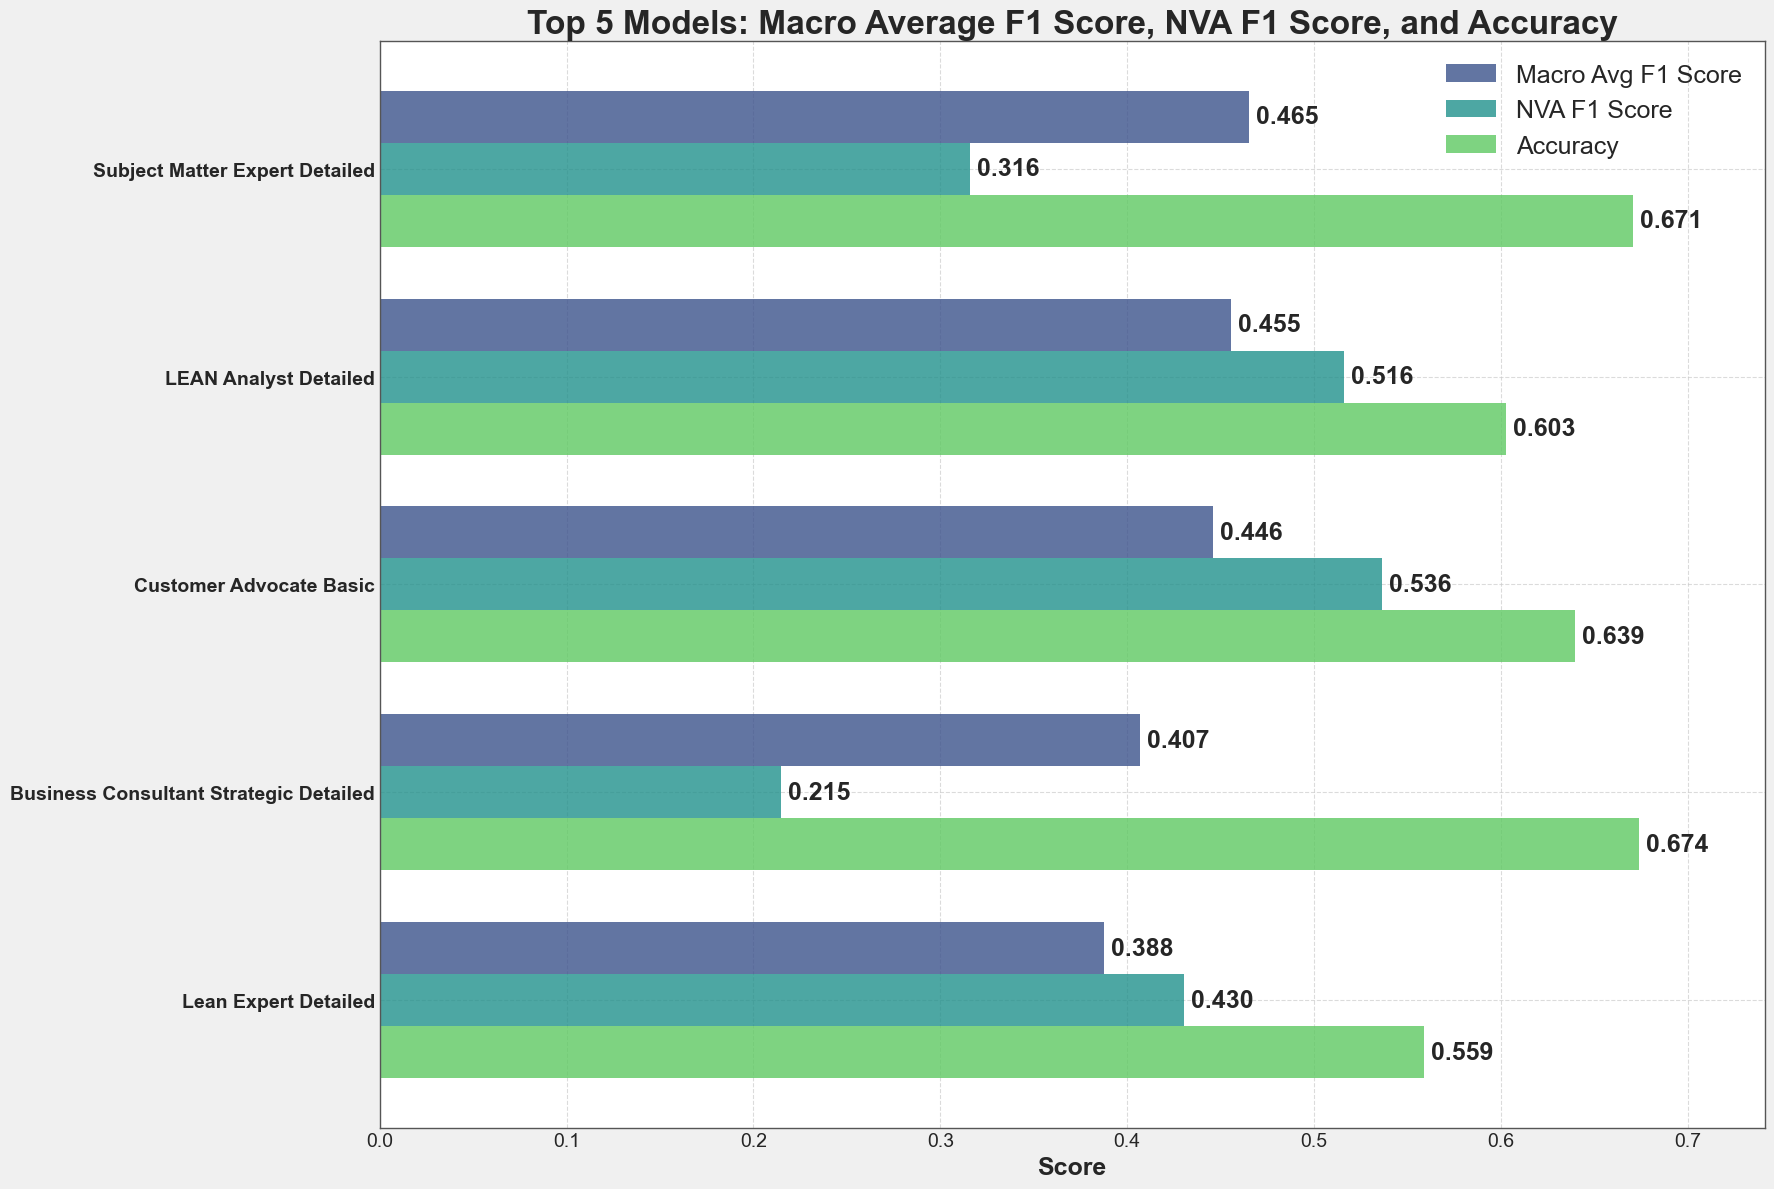

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sort by Macro Avg F1 score and get top 5
top_5 = df.sort_values('Macro Avg F1', ascending=False).head(5)

# Set up the plot style
plt.style.use('seaborn-whitegrid')
colors = sns.color_palette("viridis", 3)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(20, 12))

# Set the height of each bar and the positions of the bars
height = 0.25
y = np.arange(len(top_5))

# Create the grouped horizontal bar plot
bars1 = ax.barh(y - height, top_5['Macro Avg F1'], height, label='Macro Avg F1 Score', color=colors[0], alpha=0.8)
bars2 = ax.barh(y, top_5['NVA F1'], height, label='NVA F1 Score', color=colors[1], alpha=0.8)
bars3 = ax.barh(y + height, top_5['Accuracy'], height, label='Accuracy', color=colors[2], alpha=0.8)

# Customize the plot
ax.set_xlabel('Score', fontsize=18, fontweight='bold')
ax.set_title('Top 5 Models: Macro Average F1 Score, NVA F1 Score, and Accuracy', fontsize=24, fontweight='bold')
ax.set_yticks(y)
ax.set_yticklabels(top_5['Model Name'], fontsize=16, fontweight='bold')
ax.legend(fontsize=18, loc='upper right')

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# Add value labels on the bars
def add_value_labels(bars):
    for bar in bars:
        width = bar.get_width()
        ax.text(width, bar.get_y() + bar.get_height()/2,
                f' {width:.3f}',
                ha='left', va='center', fontsize=18, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Improve the layout
plt.tight_layout()

# Add a light background color
fig.patch.set_facecolor('#f0f0f0')

# Add a subtle grid
ax.grid(True, linestyle='--', alpha=0.7)

# Enhance the spines
for spine in ax.spines.values():
    spine.set_edgecolor('#555555')

# Adjust the subplot layout
plt.subplots_adjust(left=0.3)

# Set the x-axis limit to slightly more than the maximum value
ax.set_xlim(0, max(top_5[['Macro Avg F1', 'NVA F1', 'Accuracy']].max()) * 1.1)

# Reverse the y-axis to have the highest Macro Avg F1 score at the top
ax.invert_yaxis()

# Save the figure
plt.savefig('top_5_models_performance_metrics.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()